In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore') # filtering warning will be ignore

import os # for some dependent function

#rint(os.listdir()) # showing all the list in input path



   
        


In [2]:
# reading the train set and showing them 


train=pd.read_csv("D:/MNIST/train.csv")


train.head(5)# showing 10 rows from head

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print(train.shape)#showing the number of roe=ws and columns 

(42000, 785)


In [4]:
#reading test set 
test=pd.read_csv("D:/MNIST/test.csv")

test.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(test.shape)

(28000, 784)


In [6]:
Y_train=train["label"]
Y_train.head(3)

0    1
1    0
2    1
Name: label, dtype: int64

In [7]:
X_train = train.drop(labels = ["label"],axis = 1) # axis=1 is for droping the column and label is for droping the label
X_train.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

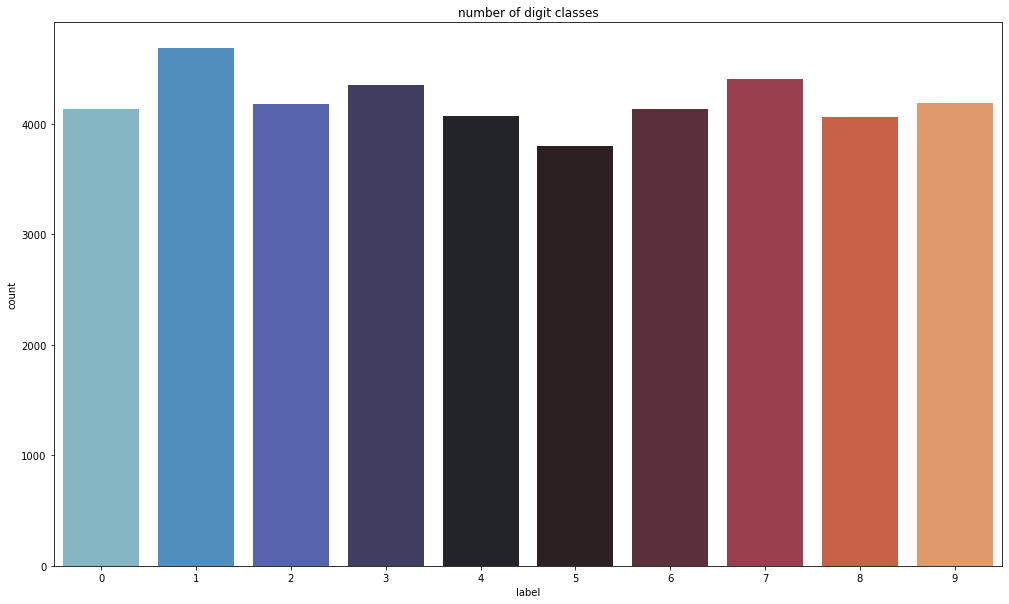

In [8]:
#making new figure 
plt.figure(figsize=(17, 10))# figsize is for width and hieght first paremeter  for width and second for hieght
g=sns.countplot(Y_train, palette="icefire") # Show the counts of observations in each categorical bin using bars
plt.title("number of digit classes")#
Y_train.value_counts()# counting the unique values ♥


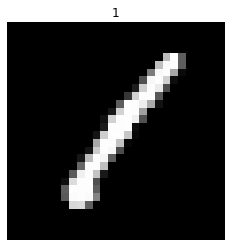

In [9]:
img =np.array(X_train.iloc[0])   # iloc for showing location and as matrix is for covnvert into numpy array
img=img.reshape((28,28)) #
plt.imshow(img , cmap='gray')
plt.title(train.iloc[0,0])

plt.axis("off")
plt.show()

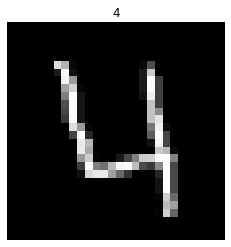

In [10]:
img =np.array(X_train.iloc[3])   # iloc for showing location and as matrix is for covnvert into numpy array
img=img.reshape((28,28))
plt.imshow(img , cmap='gray')
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()

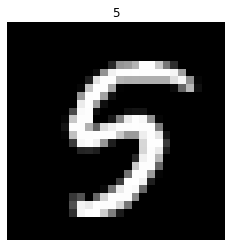

Test shape (28000, 784)


In [11]:
img =np.array(X_train.iloc[8])   # iloc for showing location and as matrix is for covnvert into numpy array
img=img.reshape((28,28))
plt.imshow(img , cmap='gray')
plt.title(train.iloc[8,0])
plt.axis("off")
plt.show()
print("Test shape", test.shape)

In [12]:
X_train=X_train/255.0 #divide by 255.0 because the grascale image pixel range from 1 to 255
test=test/255.0
print("X-tarin shape", X_train.shape)
print("Test shape", test.shape)



X-tarin shape (42000, 784)
Test shape (28000, 784)


In [13]:
X_train = X_train.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)


x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [14]:
from keras.utils import to_categorical 

In [15]:
Y_train=to_categorical(Y_train , num_classes=10)#changing y train variable to catogorical and number of classes will be 10 bcz the idems starts from 0 to 9

In [16]:
from sklearn.model_selection import train_test_split


In [17]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2) # random_state=2 for generating a constant random number to make the train test 

In [18]:
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


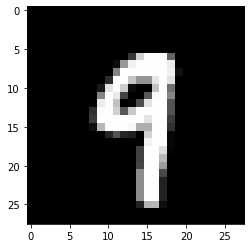

In [31]:
plt.imshow(X_train[2][:,:,0] , cmap='gray')
plt.show()

Feauture detector detects features like edges or convex shapes. Example, if out input is dog, feature detector can detect features like ear or tail of the dog

The feature map is the output of one filter applied to the previous layer.


In [20]:
from sklearn.metrics import confusion_matrix #use for accurracy

import itertools # usae for iteration
from keras.utils.np_utils import to_categorical
from keras.models import Sequential # creating layer by layer have one tendsor as input and one tensor as output
from keras.layers import Dense ,Dropout ,Flatten , Conv2D,MaxPool2D # dense is output = activation(dot(input, kernel) + bias) 

# dropout is droping the random neurans 
# flatten is to change multiDimensional array to 1D
#pool To reduce the size


RMSprop is a gradient based optimization technique used in training neural networks. ... This normalization balances the step size (momentum), decreasing the step for large gradients to avoid exploding, and increasing the step for small gradients to avoid vanishing


In [21]:
from keras.optimizers import RMSprop ,Adam # adam is an optimizer 
from keras.preprocessing.image import ImageDataGenerator# for data preproccesing 
from keras.callbacks import ReduceLROnPlateau #Reduce learning rate when a metric has stopped improving.

In [22]:
#modeling 
model=Sequential()

In [23]:
#adding first hl
model.add(Conv2D(filters=8, kernel_size=(5,5), padding='same' ,activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [24]:
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2) ,strides=(2,2)))
model.add(Dropout(0.25))


In [25]:
#fully connected
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

define optimizer 


In [28]:
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)

In [29]:
# compiling the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])